<h2> HITS ALGORITHM </h2>

In [183]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [234]:
N= 5     #Number of Nodes or web pages
Node = 2 #the selected node
K = 10 

In [185]:
G= nx.gnp_random_graph(N,0.6,seed=None, directed=True) # generate random directed graph

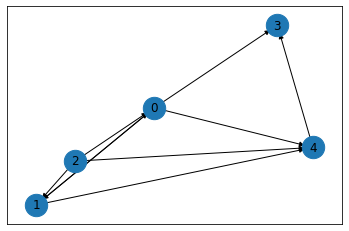

In [186]:
# visualize graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(),edge_color='black')
nx.draw_networkx_labels(G, pos)
plt.show()

In [187]:
#Choosing the node or the webpage
out_e=G.out_edges(nbunch=Node)
in_e= G.in_edges(nbunch=Node)
print(out_e)
print(in_e)

[(2, 0), (2, 1), (2, 4)]
[]


In [188]:
outlist=list(out_e)
inlist=list(in_e)


In [189]:
D= nx.DiGraph()
D.add_edges_from(outlist)
D.add_edges_from(inlist)

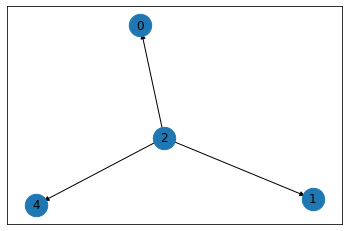

In [190]:
# visualize graph
pos = nx.spring_layout(D)
nx.draw_networkx_nodes(D,pos,node_size=500)
nx.draw_networkx_edges(D, pos, edgelist=D.edges(),edge_color='black')
nx.draw_networkx_labels(D, pos)
plt.show()

In [191]:
A = nx.to_numpy_matrix(D) #Convert Graph to Adjacency matrix
print(A)

[[0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [220]:
#initializing hubs and authorities
hubs =np.ones(len(A))
authorities = np.ones(len(A))

[1. 1. 1. 1.]


In [204]:
#start algorithm 
authorities = np.dot(A,hubs.reshape(-1,1))
#print(C_authorities)

[[0. 1. 1. 1.]]


In [205]:
AT = A.T  #transpose 
hubs = np.dot(AT, authorities) 

[[3. 0. 0. 0.]]


In [207]:
# Normalization
def Normalization(x):
    out = x/np.linalg.norm(x)
    return out

In [208]:
#interations 
for i in range(0,k-1):
        C_hubs = Normalization(C_hubs)
        C_authorities = np.dot(AC,C_hubs)
        C_hubs = np.dot(ACT,C_authorities)
#visulizing Hub Scores Authority Scores at K interation
print("Hub Scores: ", C_hubs) 
print("Authority Scores: ", C_authorities)

<h3>Exexution on course example </h3>

In [424]:
AC = np.matrix('0 1 1 ; 1 0 0 ;0 1 0')
print(AC)

[[0 1 1]
 [1 0 0]
 [0 1 0]]


In [425]:
C_hubs =np.ones(len(AC))
C_authorities = np.ones(len(AC))
print(C_hubs)

[1. 1. 1.]


In [430]:
C_authorities = np.dot(AC,C_hubs.reshape(-1,1))
#print(C_authorities)
ACT = AC.T
C_hubs = np.dot(ACT, C_authorities)
#print(C_hubs)
#print(AC)
#print(ACT)

[[9.43386202e+00]
 [4.80295188e-05]
 [5.83044737e+00]]
[[4.80295188e-05]
 [1.52643094e+01]
 [9.43386202e+00]]
[[0 1 1]
 [1 0 0]
 [0 1 0]]
[[0 1 0]
 [1 0 1]
 [1 0 0]]


In [423]:
for i in range(0,k-1):
        C_hubs = Normalization(C_hubs)
        C_authorities = np.dot(AC,C_hubs)
        C_hubs = np.dot(ACT,C_authorities)
print("Hub Scores: ", C_hubs) 
print("Authority Scores: ", C_authorities)

Hub Scores:  [[4.80295188e-05]
 [2.22703273e+00]
 [1.37638192e+00]]
Authority Scores:  [[1.37638192e+00]
 [4.80295188e-05]
 [8.50650807e-01]]
